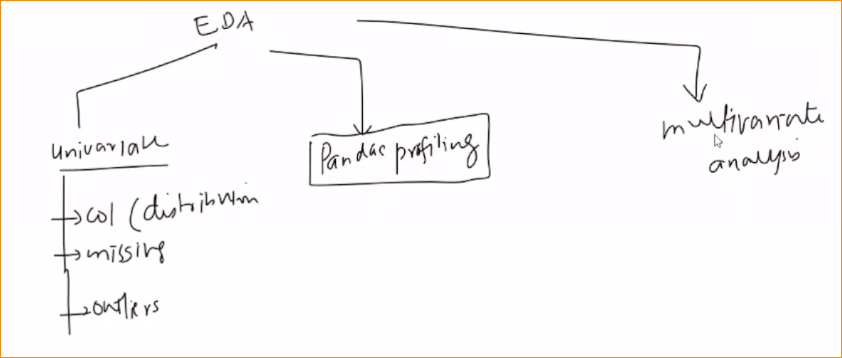

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [25]:
df.shape

(3803, 23)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [27]:
df.duplicated().sum()

126

In [28]:
#dropping all duplicate rows
df.drop_duplicates(inplace=True)

In [29]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


## 1. Property type

<AxesSubplot:xlabel='property_type'>

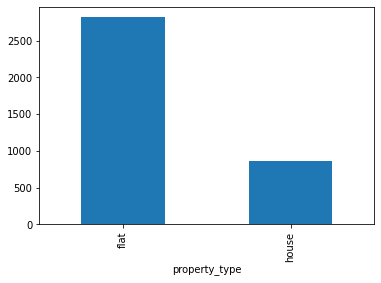

In [30]:
#since its a categorical column so to understand the 
#data distribution means the category count in data
#we can plot bar chart

df['property_type'].value_counts().plot(kind='bar')

In [31]:
#observation
#75% of data is of flats & 25% of houses
#no missing values

## 2. Society

In [32]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [33]:
#its a categorical column with high cardinality

df['society'].value_counts().shape

(676,)

In [34]:
#if we notice out of 676 categories, 486 are independent houses

In [35]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [36]:
#by doing we can see that out of 676 total societies.. 3600 flats
#out of which top 75 societies hold 1800 flats which is 50% of total flats
#remaining 600 socity hold remaining 1800 flats
#this will create a problem in future

In [38]:
society_counts = df['society'].value_counts()

#frequency distribution fr societies
frequency_bins = {
    "Very High (>100)":(society_counts > 100).sum(),
    "High (50-100)":(society_counts >= 50).sum() & (society_counts <= 100).sum(),
    "Average (10-49)":(society_counts >= 10).sum() & (society_counts <= 50).sum(),
    "Low (2-9)":(society_counts >= 1).sum() & (society_counts <= 10).sum(),
    "Very Low (1)":(society_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 3,
 'Average (10-49)': 1,
 'Low (2-9)': 512,
 'Very Low (1)': 308}

<AxesSubplot:xlabel='society'>

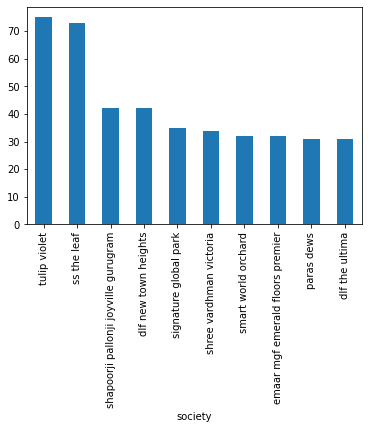

In [40]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [41]:
df['society'].isnull().sum()

1

In [42]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


In [43]:
#this row is not useful

In [44]:
#observations
#around 13% (486) comes under independent tag
#there are 675 socities
#top 75 socities holds 50% of total properties count & remaining 600 socities hold remaing 50% property
# {'Very High (>100)': 1,
#  'High (50-100)': 3,
#  'Average (10-49)': 1,
#  'Low (2-9)': 512,
#  'Very Low (1)': 308}
#1 missing value which has lot of column values missing

## 3. Sector

In [47]:
#unique sectors
#its a categorical column & also high cardinality
df['sector'].value_counts().shape

(104,)

<AxesSubplot:xlabel='sector'>

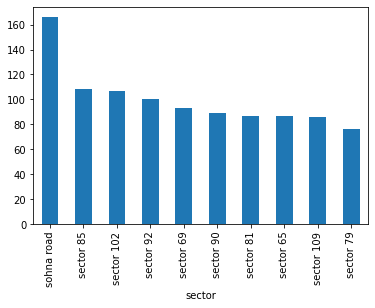

In [48]:
#top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [50]:
#frequency distribution for sector
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 60,
 'Low (2-9)': 16,
 'Very Low (1)': 0}

In [51]:
# Observations
# There are a total of 104 unique sectors in the dataset.
# Frequency distribution of sectors:
# Very High (>100): 3 sectors have more than 100 listings.
# High (50-100): 25 sectors have between 50 to 100 listings.
# Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
# Low (2-9): 16 sectors have between 2 to 9 listings.
# Very Low (1): Interestingly, there are no sectors with only 1 listing,
# means no sector has less then 16 properties

## 4. Price

In [52]:
# its most important column bcoz this will be the target column

In [53]:
#missing values
df['price'].isnull().sum()

17

In [54]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [57]:
#above shows avg property cost is 2.5cr
#min cost is 7lacs
#25% properties are below 95 lacs
#50% properties are below 1.5cr --> this is a realistic number
#75% properties are below 2.75cr
#there is a property of cost 31.5cr which is max which deviates the mean price

In [58]:
df[df['price'] == 31.5]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.5,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,2,74


<AxesSubplot:xlabel='price', ylabel='Count'>

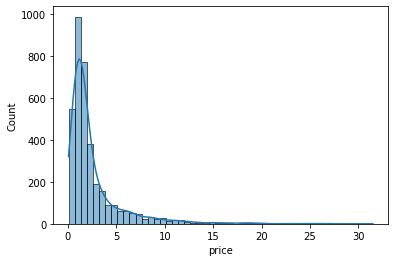

In [59]:
sns.histplot(df['price'], kde=True, bins=50)

In [61]:
#it shows data is skewed which says lot of properties prices are less
#and very few of the property prices are very high

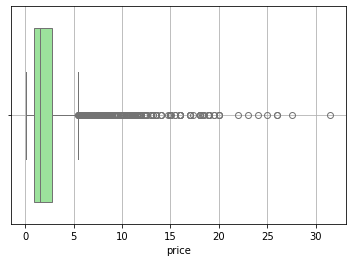

In [62]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [63]:
#everything above 5cr is an outliar

In [65]:
# Descriptive Statistics:
# Count: There are 3,660 non-missing price entries.
# Mean Price: The average price is approximately 2.53 crores.
# Median Price: The median (or 50th percentile) price is 1.52 crores.
# Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
# Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
# IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

# Visualizations:
# Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
# Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
# Missing Values: There are 17 missing values in the price column.

In [66]:
# Skewness and Kurtosis
# Skewness tells how skewd & in which direction 
# kurtosis tells how many outliars in data
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


In [67]:
# Skewness: The price distribution has a skewness of approximately 3.28,
# indicating a positive skew. This means that the distribution tail is
#skewed to the right, which aligns with our observation from the histogram
#where most properties have prices on the lower end with a few high-priced properties.

# Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater
#than 3 indicates a distribution with heavier tails and more outliers
#compared to a normal distribution.

In [68]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

In [69]:
# Quantile Analysis:

# 1% Quantile: Only 1% of properties are priced below 0.25 crores.
# 5% Quantile: 5% of properties are priced below 0.37 crores.
# 95% Quantile: 95% of properties are priced below 8.5 crores.
# 99% Quantile: 99% of properties are priced below 15.26 crores,
# indicating that very few properties are priced above this value.

In [70]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [71]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [72]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [74]:
#there are 425 outliars which is a lot
#we need to study them seperatly

In [73]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [76]:
# Outliers Analysis (using IQR method):

# Based on the IQR method, there are 425 properties considered as outliers.
# These outliers have an average price of approximately 9.24 crores.
# The range for these outliers is from 5.46 crores to 31.5 crores.

<AxesSubplot:xlabel='price'>

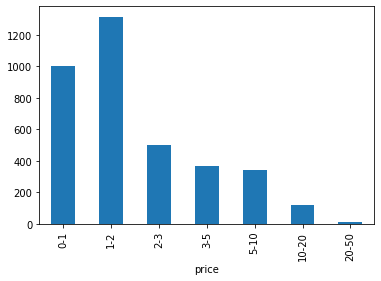

In [77]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

In [79]:
# The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
# There's a significant drop in the number of properties priced above "5 crores."

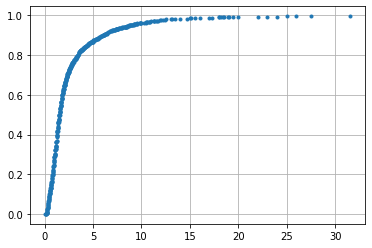

In [80]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

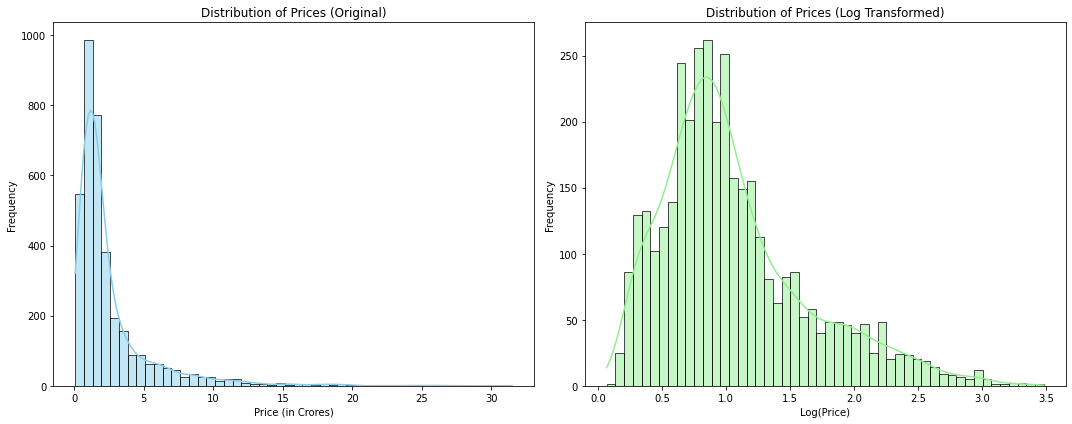

In [81]:
#since its a right skewed data, we can apply log transformation

plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [82]:
# np.log1p(x): This function computes the natural logarithm of 1+x.
# It's designed to provide more accurate results for values of x that are very close to zero.

# Using np.log1p helps in transforming the price column while ensuring
#that any value (including zero, if present) is handled appropriately.
#When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [83]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


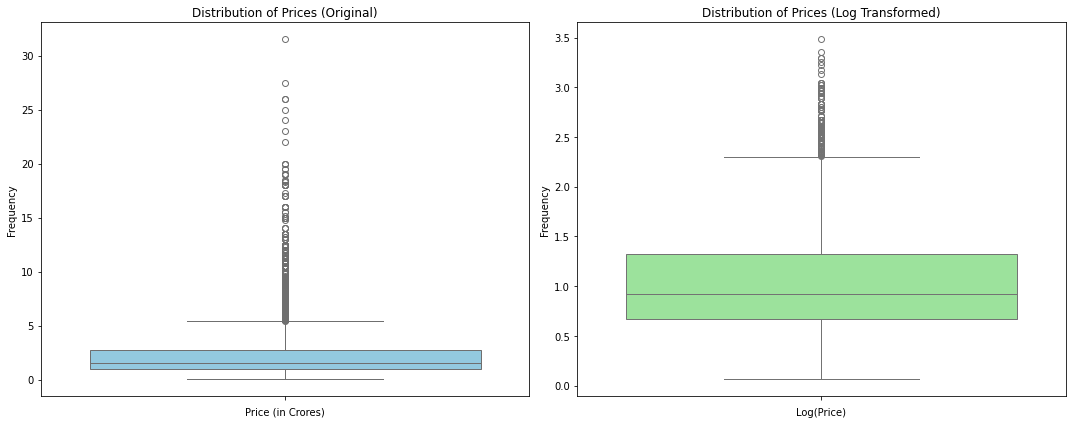

In [84]:
#same transformation applied on box plot

plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [86]:
#until now we have detected outliars.. we'll remove/handle them later 

## 5. price_per_sqft

In [87]:
df['price_per_sqft'].isnull().sum()

17

In [88]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [89]:
# avg sqft cost is 13892
# which in tier 2 or 3 cities will be around 5000

In [90]:
# A standard deviation (or σ) is a measure of how dispersed the data is in relation to
# the mean. Low, or small, standard deviation indicates data are clustered tightly around
# the mean, and high, or large, standard deviation indicates data are more spread out.

In [91]:
# Usually, the standard deviation is smaller than the mean, or at least not
# significantly larger.

# If the mean is 13000 and the standard deviation is 23000, it suggests that the data
# points in your dataset are widely spread out from the mean. A large standard deviation
# compared to the mean indicates a high variability or dispersion of values within the
# dataset. In this case, the spread of values is quite significant, almost double the
# magnitude of the mean, which means the data points might be far from the average.

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

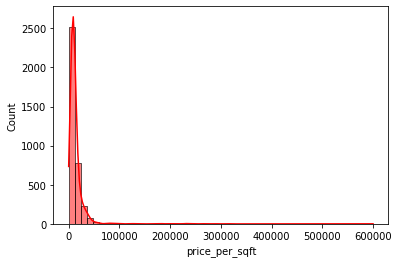

In [93]:
sns.histplot(df['price_per_sqft'],bins=50,color='red',kde=True)

In [94]:
#this is also right skewd data

<AxesSubplot:ylabel='price_per_sqft'>

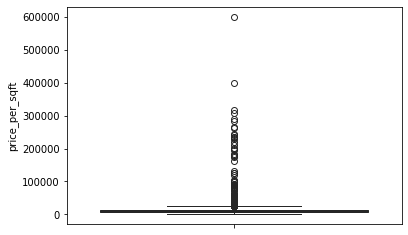

In [95]:
sns.boxplot(df['price_per_sqft'],color='green')

In [97]:
#boxplot shows several outliars, this needs to be fixed!!

In [98]:
#observation
# 1. potential outliars
# 2. right skewd data
# 3. 17 missing values

## 6. bedroom

In [99]:
df['bedRoom'].isnull().sum()

0

<AxesSubplot:xlabel='bedRoom'>

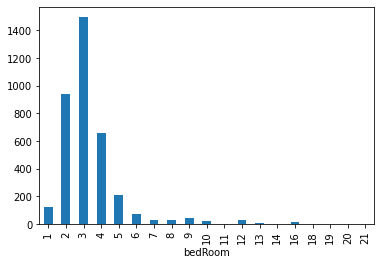

In [101]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:ylabel='proportion'>

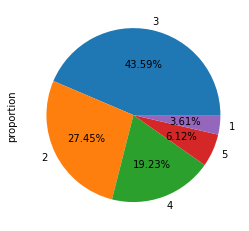

In [103]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [104]:
#mostly there are 3bhks, 2bhks & 4bhks

## 7. bathroom

In [105]:
df['bathroom'].isnull().sum()

0

<AxesSubplot:xlabel='bathroom'>

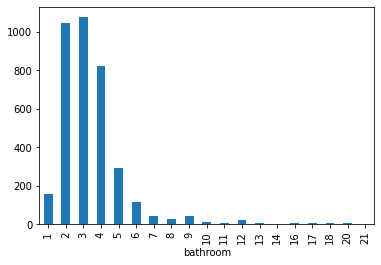

In [106]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:ylabel='proportion'>

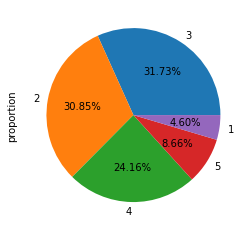

In [107]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [112]:
#observation
#mostly there are 2-3-4 bathrooms
#bedroom & bathroom have similar distribution, they both have strong similar co-relation
#there might be multi-colinearity b/w these 2 columns

## 8. balcony

In [111]:
df['balcony'].isnull().sum()

0

<AxesSubplot:xlabel='balcony'>

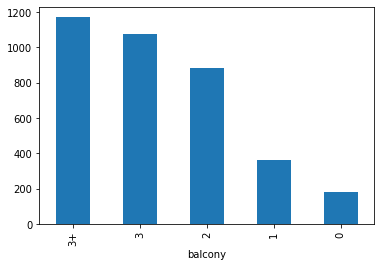

In [113]:
df['balcony'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='proportion'>

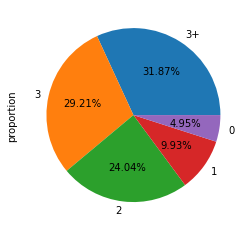

In [114]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [115]:
# observation
# 1. its a categorical column
# 2. most flats have 3+ balconies

## 9. floorNum

In [118]:
df['floorNum'].isnull().sum()

19

In [119]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

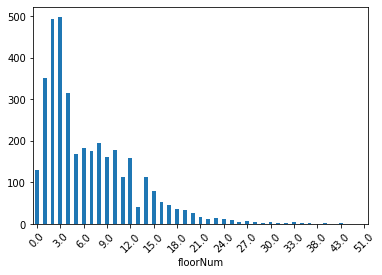

In [133]:
counts = df['floorNum'].value_counts().sort_index()
counts.plot(kind='bar')

ticks = plt.xticks()[0]
counts.plot(kind='bar')
n = 3  # Change this value as needed
plt.xticks(ticks[::n], counts.index[::n], rotation=45)
plt.show()

<AxesSubplot:ylabel='floorNum'>

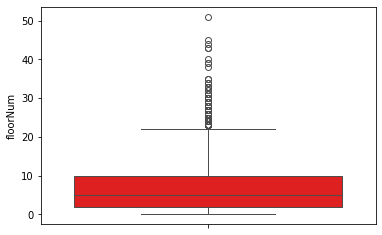

In [134]:
sns.boxplot(df['floorNum'],color='red')

In [135]:
#observation
#19 missing values
#majority of properties are b/w 0-4th floor, 3rd floor is most frequent
#boxplot reveals majority of properties are b/w 0-10th floors
#everything beyond 20th floor are potential outliars

## 10. facing

In [136]:
df['facing'].isnull().sum()

1045

<AxesSubplot:xlabel='facing'>

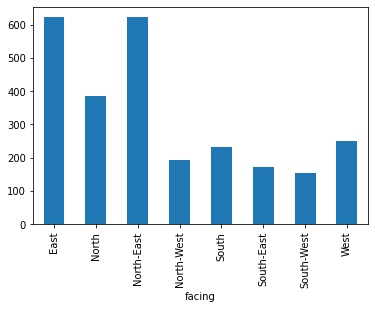

In [143]:
df['facing'].value_counts().sort_index().plot(kind='bar')

In [148]:
#majorly northeast, east, north & west facing properties are available
#1045 missing values

## 11. agepossesion

In [147]:
df['agePossession'].isnull().sum()

0

In [149]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

In [150]:
#mostly new properties
#some properties are undefined

## 12. super_built_up_area

In [153]:
#builtup area - total are on which property is built
#carpet area - substract balcony area & area covered by thickness of walls from builtup area
#super builtup area - flat + lift area + stairs area (common area)
#lets say super builtup area 1995 which is including common area --> builtup area 1615
#is the actual area of house --> carpet area is the actual area which will be used

In [154]:
df['super_built_up_area'].isnull().sum()

1802

In [155]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<AxesSubplot:xlabel='super_built_up_area', ylabel='Count'>

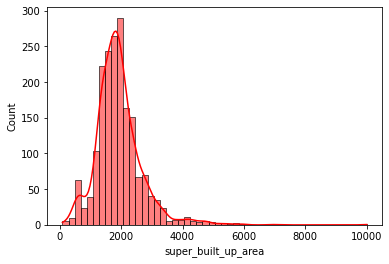

In [156]:
sns.histplot(df['super_built_up_area'].dropna(),bins=50, color='red',kde=True)

<AxesSubplot:ylabel='super_built_up_area'>

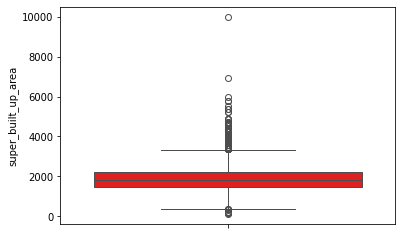

In [157]:
sns.boxplot(df['super_built_up_area'].dropna(),color = 'red')

In [158]:
#observation
# most properties have superbuiltup area b/w 1000-2000
# few properties are ofgnificantly large area leading to right skewd data but can be solved
# 1800 missing values
# several outliars

## 13. built_up_area

In [159]:
df['built_up_area'].isnull().sum()

1987

In [160]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<AxesSubplot:xlabel='built_up_area', ylabel='Count'>

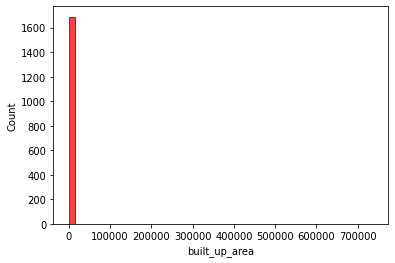

In [162]:
sns.histplot(df['built_up_area'],color='red', bins=50, kde=False)

<AxesSubplot:ylabel='built_up_area'>

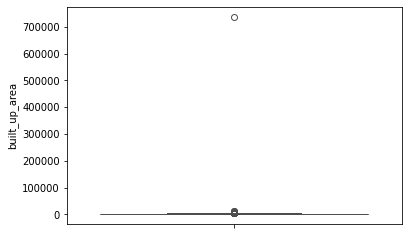

In [164]:
sns.boxplot(df['built_up_area'].dropna(), color='red')

In [165]:
#observation
#there is some issue with area conversion thats why there are very big values
#most properties are rangin b/w 500-3500 sqft
#there are few properties with very high area leading to right skewed data
#also confirmed by boxplot
#outliars value suggest that either there's a very big property or entire building area is listed

## 14. carpet_area

In [166]:
df['carpet_area'].isnull().sum()

1805

In [167]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<AxesSubplot:xlabel='carpet_area', ylabel='Count'>

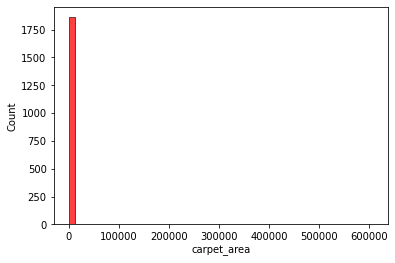

In [168]:
sns.histplot(df['carpet_area'].dropna(),bins=50,color='red',kde=False)

<AxesSubplot:ylabel='carpet_area'>

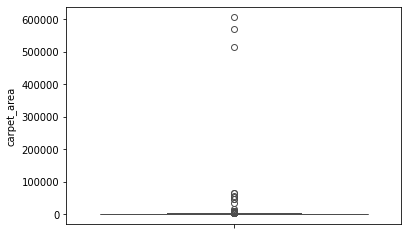

In [169]:
sns.boxplot(df['carpet_area'].dropna(),color='red')

In [170]:
#carpet area is similar as earlier.. there's a flat of 600000 sqft
#which makes all analysis waste

## 15. additional rooms

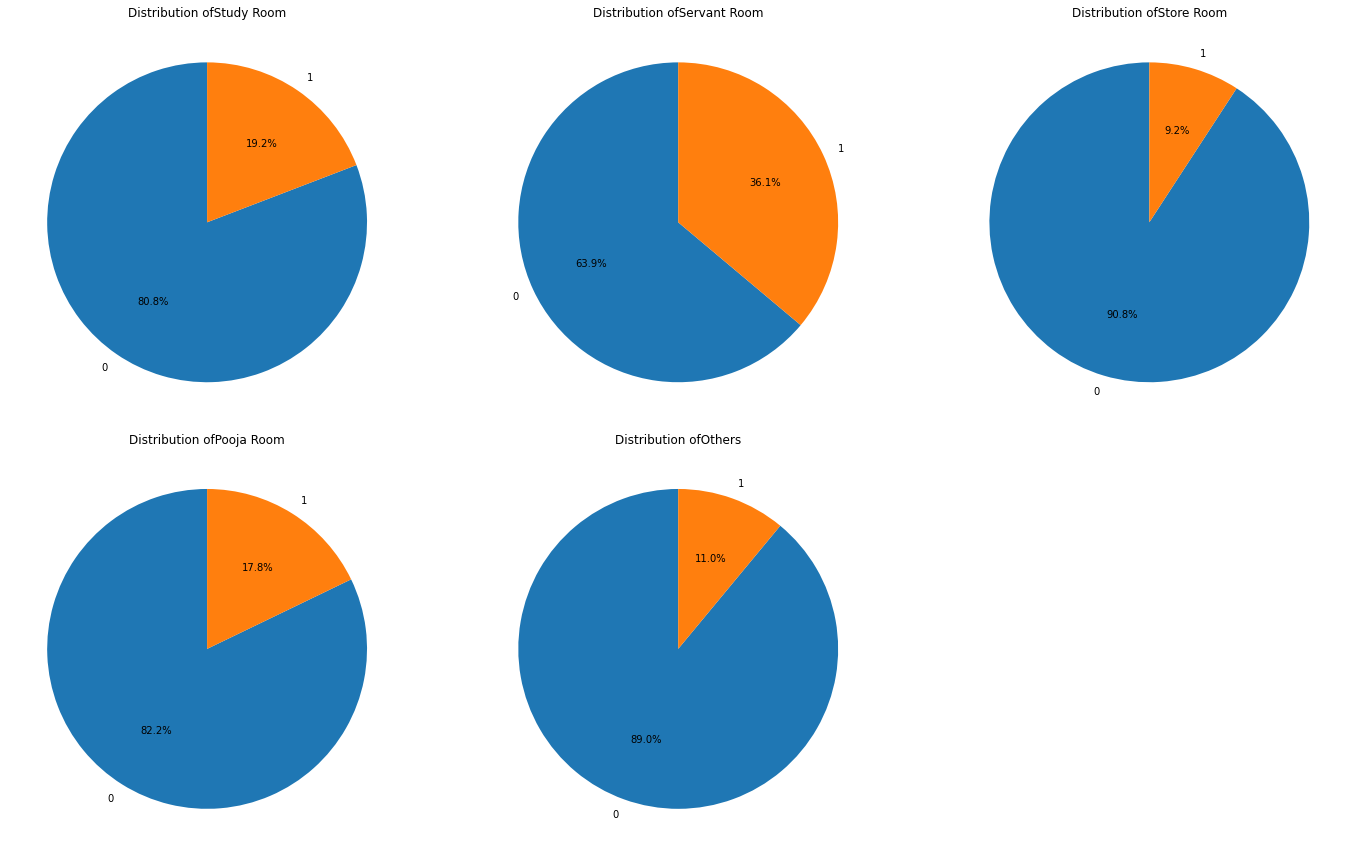

In [174]:
plt.figure(figsize=(20,12))

#create a subplot of piechart for each room type
for idx,room in enumerate(['study room','servant room','store room','pooja room','others'],1):
    ax = plt.subplot(2,3,idx)
    df[room].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, ax=ax)
    plt.title(f'Distribution of{room.title()}')
    plt.ylabel('')
              
plt.tight_layout()
plt.show()

## 16. furnishing type

In [175]:
df['furnishing_type'].value_counts()

furnishing_type
0    2411
1    1059
2     207
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

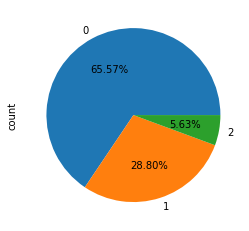

In [176]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

## 17. luxury_score

In [177]:
df['luxury_score'].isnull().sum()

0

In [178]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<AxesSubplot:xlabel='luxury_score', ylabel='Count'>

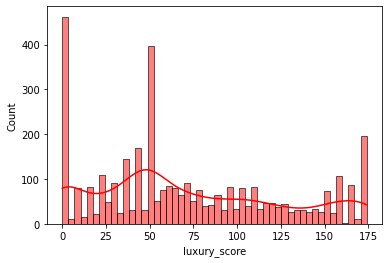

In [181]:
sns.histplot(df['luxury_score'], bins=50, color='red', kde=True)

<AxesSubplot:ylabel='luxury_score'>

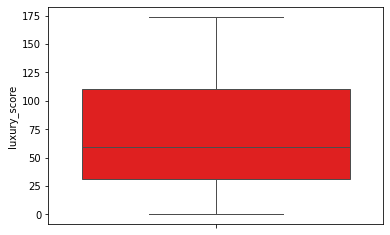

In [182]:
sns.boxplot(df['luxury_score'], color='red')

In [183]:
#observation
#luxury score distribution have multiple peaks suggesting multi modal distribution
#majorly properties have 30-110 luxury score as per IQR

In [184]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [185]:
# Complete summary
# there are lot of missing values
# there are potential outliars which needs to be handled